In [118]:
import glob 
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt

dic = pd.read_csv("./Base de Dados/legenda.txt",delimiter=';', encoding='utf-8')

In [119]:
def arrumaDb(db,leg):
    listaNomesDb = []
    listaNomesLeg = []
    dic = {}
    listaCodFica= []
    for x in range(len(leg["codmunicípio"])):
        listaCodFica.append(leg["codmunicípio"][x])
    db = db.where((db["município"]).isin(listaCodFica)).dropna()
    db = db.drop(columns=['região','uf','subclasse','saldomovimentação','cbo2002ocupação','categoria','tipoestabelecimento','tipodedeficiência','indtrabintermitente','horascontratuais','tamestabjan','indicadoraprendiz','fonte','competência','indtrabparcial'])
    
    for name in leg.columns:
        listaNomesLeg.append(name)
    
    for name in db.columns:
        listaNomesDb.append(name)
    
    for k in range(0,len(leg.columns),2):
        dic = {}
        for i in range(len(leg)):
            if (leg.notna()[listaNomesLeg[k]][i]):
                dic[leg[listaNomesLeg[k]][i]]=leg[listaNomesLeg[k+1]][i]
        try:
            db[listaNomesLeg[k+1]]=db[listaNomesLeg[k+1]].map(dic)
        except:
            print(sys.exc_info()[0])
     
    return db

In [120]:
def pesquisaQuant(df,entrada,coluna):
    pesquisaFeita = ""
    kery = ""
    
    if(isinstance(coluna, list)):
        for q in range(len(coluna)):
            if(isinstance(entrada, list)):
                kery+= f'{coluna[q]}=="{entrada[q]}"'
            else:
                kery+= f'{coluna[q]}=="{entrada}"' 
            if (coluna[q]!=coluna[-1]):
                kery+=" and "
    else:
        if(isinstance(entrada, list)):
            for q in range(len(entrada)):
                kery+= f'{coluna}=="{entrada[q]}"'
                if (entrada[q]!=entrada[-1]):
                    kery+=" and "
        else:
            kery+= f'{coluna}=="{entrada}"' 

    quantidade = df.query(kery)[coluna].count()
    
    try:
        quantidade = quantidade[0]
    except:
        return quantidade
    return quantidade

In [121]:
jan2020 = pd.read_csv("./Base de Dados/CAGEDMOV202001.txt",delimiter=';', encoding='utf-8')
jan2020 = arrumaDb(jan2020, dic)
print("jan2020 carregado")
fev2020 = pd.read_csv("./Base de Dados/CAGEDMOV202002.txt",delimiter=';', encoding='utf-8')
fev2020 = arrumaDb(fev2020, dic)
print("fev2020 carregado")
mar2020 = pd.read_csv("./Base de Dados/CAGEDMOV202003.txt",delimiter=';', encoding='utf-8')
mar2020 = arrumaDb(mar2020, dic)
print("mar2020 carregado")
abr2020 = pd.read_csv("./Base de Dados/CAGEDMOV202004.txt",delimiter=';', encoding='utf-8')
abr2020 = arrumaDb(abr2020, dic)
print("abr2020 carregado")
mai2020 = pd.read_csv("./Base de Dados/CAGEDMOV202005.txt",delimiter=';', encoding='utf-8')
mai2020 = arrumaDb(mai2020, dic)
print("mai2020 carregado")
jun2020 = pd.read_csv("./Base de Dados/CAGEDMOV202006.txt",delimiter=';', encoding='utf-8')
jun2020 = arrumaDb(jun2020, dic)
print("jun2020 carregado")
jul2020 = pd.read_csv("./Base de Dados/CAGEDMOV202007.txt",delimiter=';', encoding='utf-8')
jul2020 = arrumaDb(jul2020, dic)
print("jul2020 carregado")
ago2020 = pd.read_csv("./Base de Dados/CAGEDMOV202008.txt",delimiter=';', encoding='utf-8')
ago2020 = arrumaDb(ago2020, dic)
print("ago2020 carregado")
set2020 = pd.read_csv("./Base de Dados/CAGEDMOV202009.txt",delimiter=';', encoding='utf-8')
set2020 = arrumaDb(set2020, dic)
print("set2020 carregado")
out2020 = pd.read_csv("./Base de Dados/CAGEDMOV202010.txt",delimiter=';', encoding='utf-8')
out2020 = arrumaDb(out2020, dic)
print("out2020 carregado")
nov2020 = pd.read_csv("./Base de Dados/CAGEDMOV202011.txt",delimiter=';', encoding='utf-8')
nov2020 = arrumaDb(nov2020, dic)
print("nov2020 carregado")
dez2020 = pd.read_csv("./Base de Dados/CAGEDMOV202012.txt",delimiter=';', encoding='utf-8')
dez2020 = arrumaDb(dez2020, dic)
print("dez2020 carregado")

jan2020 carregado
fev2020 carregado
mar2020 carregado
abr2020 carregado
mai2020 carregado
jun2020 carregado
jul2020 carregado
ago2020 carregado
set2020 carregado
out2020 carregado
nov2020 carregado
dez2020 carregado


In [127]:
mesesDF = [jan2020,fev2020,mar2020,abr2020,mai2020,jun2020,jul2020,ago2020,set2020,out2020,nov2020,dez2020]
admi=[]
desl=[]
for index in range(len(mesesDF)):
    admi.append(pesquisaQuant(mesesDF[index],"Admissão","tipomovimentação"))
    desl.append(pesquisaQuant(mesesDF[index],"Desligamento","tipomovimentação"))

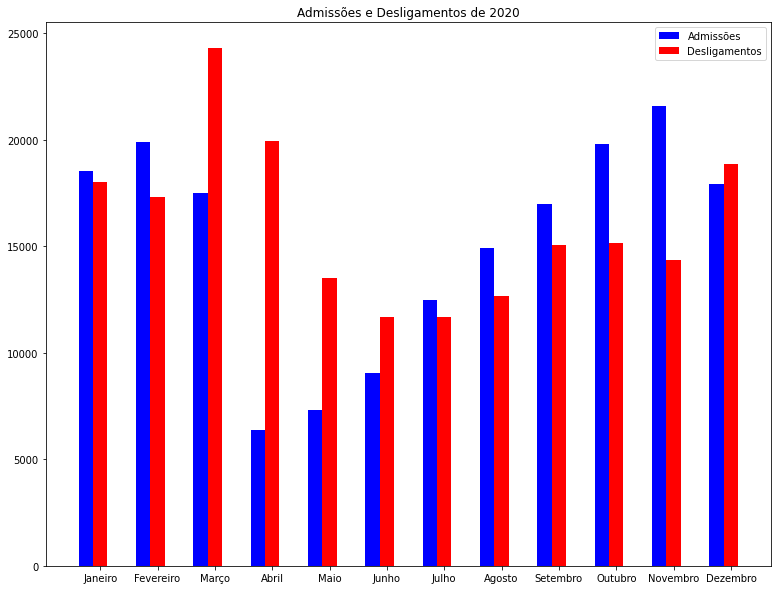

In [130]:
fig, (tx1) = plt.subplots(figsize=(13,10))
meses = ['Janeiro','Fevereiro','Março','Abril','Maio','Junho','Julho','Agosto','Setembro','Outubro','Novembro','Dezembro']

# Cria eixo x para produto A e produto B com uma separação de 0.25 entre as barras
x1 =  np.arange(len(admi))
x2 = [x + 0.25 for x in x1]

# Plota as barras
plt.bar(x1, admi, width=0.25, label = 'Admissões', color = 'blue')
plt.bar(x2, desl, width=0.25, label = 'Desligamentos', color = 'red')

# coloca o nome dos meses como label do eixo x
plt.xticks([x + 0.25 for x in range(len(admi))], meses)

# inseri uma legenda no gráfico
plt.legend()

plt.title("Admissões e Desligamentos de 2020")
plt.show()

In [128]:
admiH=[]
deslH=[]
admiM=[]
deslM=[]
for index in range(len(mesesDF)):
    admiH.append(pesquisaQuant(mesesDF[index],["Admissão","Homem"],["tipomovimentação","sexo"]))
    deslH.append(pesquisaQuant(mesesDF[index],["Desligamento","Homem"],["tipomovimentação","sexo"]))
    admiM.append(pesquisaQuant(mesesDF[index],["Admissão","Mulher"],["tipomovimentação","sexo"]))
    deslM.append(pesquisaQuant(mesesDF[index],["Desligamento","Mulher"],["tipomovimentação","sexo"]))

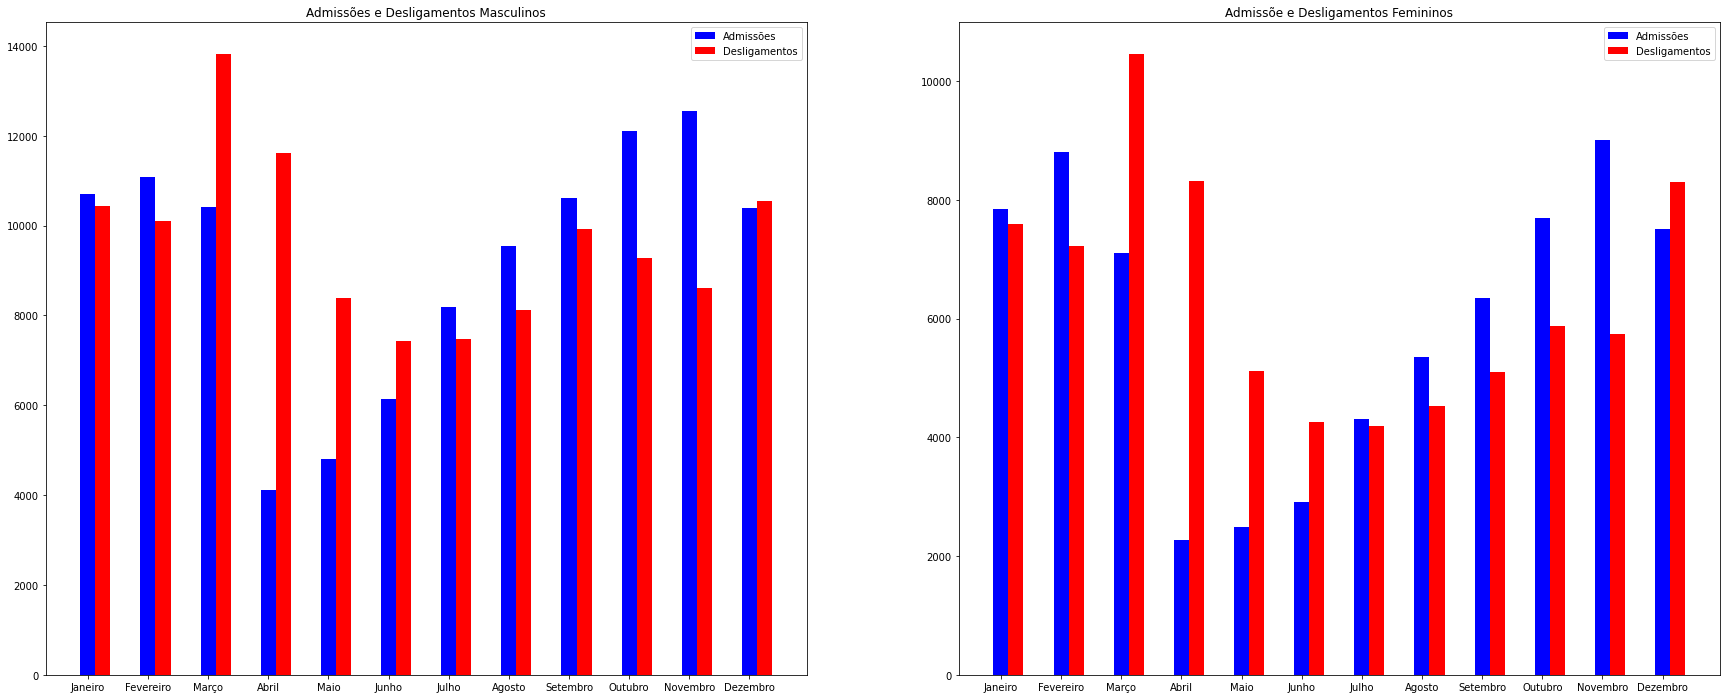

In [129]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30,12))

# Cria eixo x para x1 e x2 com uma separação de 0.25 entre as barras
x1H = np.arange(len(admiH))
x2H = [x + 0.25 for x in x1H]
x1M = np.arange(len(admiM))
x2M = [x + 0.25 for x in x1M]

# Plota as barras
ax1.bar(meses, admiH, width=0.25, label = 'Admissões', color = 'blue')
ax1.bar(x2H, deslH, width=0.25, label = 'Desligamentos', color = 'red')

ax2.bar(meses, admiM, width=0.25, label = 'Admissões', color = 'blue')
ax2.bar(x2M, deslM, width=0.25, label = 'Desligamentos', color = 'red')

# inseri uma legenda no gráfico
ax1.legend()
ax2.legend()

ax1.set(title="Admissões e Desligamentos Masculinos")
ax2.set(title="Admissõe e Desligamentos Femininos")
plt.show()

In [126]:
jan2020.query('tipomovimentação =="Admissão"')['tipomovimentação'].count()

18545